In [1]:
from math import cos
from scipy.integrate import ode
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import matplotlib.dates as mdates
# Usar "Shift+Enter" para procesar la información de la celda

La ecuación de Duffing, es una ecuación diferencial no lineal que describe el movimiento de un oscilador con amortiguamiento, con coeficiente de elasticidad no lineal y al cual se le aplica un forzamiento periódico, 

          x´´ + δ x´ + α x + β x³ =  γ cos (ω t)

donde α (rigidez) , β (no linearidad) , γ (amplitud de forzamiento), δ (amortiguamiento) y ω (frecuencia de forzamiento) son constantes.

En esta actividad se pide resolver numéricamente la ecuación de Duffing utilizando la función ode de SciPy para reproducir dicha figura en el caso de que α = γ = 1.0 y amortiguamiento δ = 0.1

Esta sistema muestra un comportamiento muy peculiar. La solución presenta una discontinuidad siguiendo rutas distintas, incrementando el valor de ω y luego disminuyéndolo. 

In [2]:
#Declaramos arreglos que contengan a las gráficas
w = []
graf = []

        
#Se definen las ecuaciones diferenciales y los parámetros.
def f(t, z, p):
    """"
        Lado derecho de las ecuaciones diferenciales
        dx/dt = y
        dy/dt = - δ*y - α*x - β*x**3 + γ*cos(ω*t)

    """
    δ, α, β, γ, ω = p                           
    #Parámetros de la integral
    x, y = z                                    
    #Parámetros de integración
    f = [y, - δ*y - α*x - β*x**3 + γ*cos(ω*t)]  
    #Función a integrar

    return f

In [3]:
#Instancia para resolver la ecuación diferencial con el método 'dopri5'
solver = ode(f)
solver.set_integrator('dopri5')

#Especificamos valores de β para obtener 4 movimientos.
βi = [-0.003,0.0000000001,0.01,0.04]

for j in range (0,len(βi)):
    #Arreglos para cada w y x
    wi=[]
    grafi=[]
    for i in range(0,251):
        #Especificamos los parámetros de la ecuación a nuestra función
        γ = 1.0
        α = 1.0        
        δ = 0.1
        ω = i*0.01
        β = βi[j]
        val = δ, α, β, γ, ω                      
        solver.set_f_params(val)
        #Fijamos z(0) = z0
        t0 = 0.0
        z0 = [1.0, 0]
        solver.set_initial_value(z0, t0)
        #Creamos un arreglo del tiempo para evaluar la solución y otro para almacenar los valores.
        t1 = 40
        n = 400
        t = np.linspace(t0, t1, n)
        sol = np.empty((n, 2))
        sol[0] = z0
        #Llamamos al integrador para que avance en la solución un tiempo 'k'
        k = 1
        while solver.successful() and solver.t < t1:
            solver.integrate(t[k])
            sol[k] = solver.y
            k += 1
        x = sol[:,0]
        wi.append(ω)
        grafi.append(max(abs(x)))
    #Almacenamos los arreglos
    w.append(wi)
    graf.append(grafi)

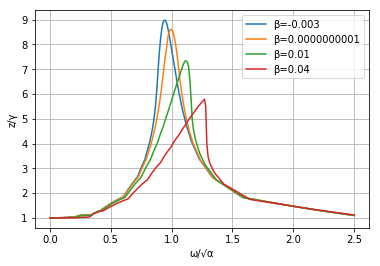

In [5]:
#En una sola gráfica, graficamos los 4 movimientos con distintas β´s.
plt.plot(w[0],graf[0],label="β=-0.003")
plt.plot(w[1],graf[1],label="β=0.0000000001")
plt.plot(w[2],graf[2],label="β=0.01")
plt.plot(w[3],graf[3],label="β=0.04")

#Agregamos títulos a los ejes.
plt.xlabel("ω/√α")
plt.ylabel("z/γ")
plt.grid(True)
plt.legend()
plt.show()